In [2]:
%pip install opencv-python
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sippa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.7 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 57.7/57.7 kB 1.5 MB/s eta 0:00:00
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/898.7 kB ? eta -:--:--
   -------- ------------------------------- 194.6/898.7 kB 5.9 MB/s eta 0:00:01
   --------- ------------------------------ 204.8/898.7 kB 2.5 MB/s eta 0:00:01
   -----


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sippa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import cv2
import os

# Input video path
input_video_path = '2566-10-30 20.24.07.mp4'
frames_output_folder = 'frames/'

# Create folder to save frames
os.makedirs(frames_output_folder, exist_ok=True)

# Open video
cap = cv2.VideoCapture(input_video_path)
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Save every nth frame (e.g., 1 frame per second)
    if frame_count % frame_rate == 0:
        frame_filename = os.path.join(frames_output_folder, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_filename, frame)

    frame_count += 1

cap.release()
print(f"Frames saved to {frames_output_folder}")


Frames saved to frames/


# Upload folder car into roboflow with object detection
![image.png](./markdown-image/upload-folder-roboflow.png)

# Create class bus, taxi, car and pedestrian
![image.png](./markdown-image/class.png)

# select augmentation
![image.png](./markdown-image/augmentation.png)

# download dataset YOLOv8 Oriented Bounding Boxs
![image.png](./markdown-image/dataset.png)

In [9]:
!pip install roboflow

  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/80.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/80.9 kB 1.9 MB/s eta 0:00:01
   -------------------- ------------------- 41.0/80.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 80.9/80.9 kB 906.0 kB/s eta 0:00:00
Using cached idna-3.7-py3-none-any.whl (66 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 4.3 MB/s eta 0:00:09
   ---------------------------------------- 0.3/38.8 MB 3.3 MB/s eta 0:00:12
   ---------------------------------------- 0.4/38.8 MB 3.4 MB/s eta 0:00:12
    --------------------------------------- 0.6/38.8 MB 3.4 MB/s eta 0:00:12
    --------------------------------------- 0.8/38.8 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.1/38.8 MB 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sippa\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\sippa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
!yolo task=detect mode=train model=yolov8s.pt data=esan-coding.v2i.yolov8-obb/data.yaml epochs=50 imgsz=800 plots=True

Ultralytics 8.3.49 🚀 Python-3.11.9 torch-2.5.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=esan-coding.v2i.yolov8-obb/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh


  0%|          | 0.00/21.5M [00:00<?, ?B/s]
  4%|▍         | 896k/21.5M [00:00<00:02, 8.34MB/s]
  8%|▊         | 1.75M/21.5M [00:00<00:03, 5.43MB/s]
 11%|█         | 2.38M/21.5M [00:00<00:04, 4.69MB/s]
 13%|█▎        | 2.88M/21.5M [00:00<00:05, 3.26MB/s]
 16%|█▌        | 3.38M/21.5M [00:00<00:05, 3.55MB/s]
 18%|█▊        | 3.88M/21.5M [00:01<00:05, 3.41MB/s]
 20%|██        | 4.38M/21.5M [00:01<00:04, 3.66MB/s]
 23%|██▎       | 4.88M/21.5M [00:01<00:04, 3.96MB/s]
 25%|██▍       | 5.38M/21.5M [00:01<00:04, 3.65MB/s]
 27%|██▋       | 5.75M/21.5M [00:01<00:04, 3.61MB/s]
 28%|██▊       | 6.12M/21.5M [00:01<00:04, 3.53MB/s]
 32%|███▏      | 6.88M/21.5M [00:01<00:03, 4.31MB/s]
 35%|███▌      | 7.62M/21.5M [00:01<00:02, 4.99MB/s]
 38%|███▊      | 8.12M/21.5M [00:02<00:03, 3.72MB/s]
 40%|████      | 8.62M/21.5M [00:02<00:04, 2.82MB/s]
 42%|████▏     | 9.00M/21.5M [00:02<00:04, 2.91MB/s]
 44%|████▎     | 9.38M/21.5M [00:02<00:04, 3.09MB/s]
 45%|████▌     | 9.75M/21.5M [00:02<00:03, 3.19MB/s]
 4

In [8]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=2566-10-30-20.24.07.mp4 save=True

Ultralytics 8.3.49 🚀 Python-3.11.9 torch-2.5.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/901) d:\Work\Project\esan-coding-2024\AI-for-arresting-criminals\2566-10-30-20.24.07.mp4: 480x800 6 buss, 54 cars, 5 pedestrians, 11 taxis, 205.3ms
video 1/1 (frame 2/901) d:\Work\Project\esan-coding-2024\AI-for-arresting-criminals\2566-10-30-20.24.07.mp4: 480x800 6 buss, 54 cars, 7 pedestrians, 13 taxis, 164.2ms
video 1/1 (frame 3/901) d:\Work\Project\esan-coding-2024\AI-for-arresting-criminals\2566-10-30-20.24.07.mp4: 480x800 6 buss, 52 cars, 6 pedestrians, 12 taxis, 135.3ms
video 1/1 (frame 4/901) d:\Work\Project\esan-coding-2024\AI-for-arresting-criminals\2566-10-30-20.24.07.mp4: 480x800 6 buss, 52 cars, 7 pedestrians, 10 taxis, 157.1ms
video 1/1 (frame 5/901) d:\Work\Project\esan-coding-2024\AI-for-arresting-criminals\2566-10-30-20.24.07.mp4: 480x800 7 buss, 50 cars, 7 pedestrians, 12 

In [10]:
from IPython.display import Image

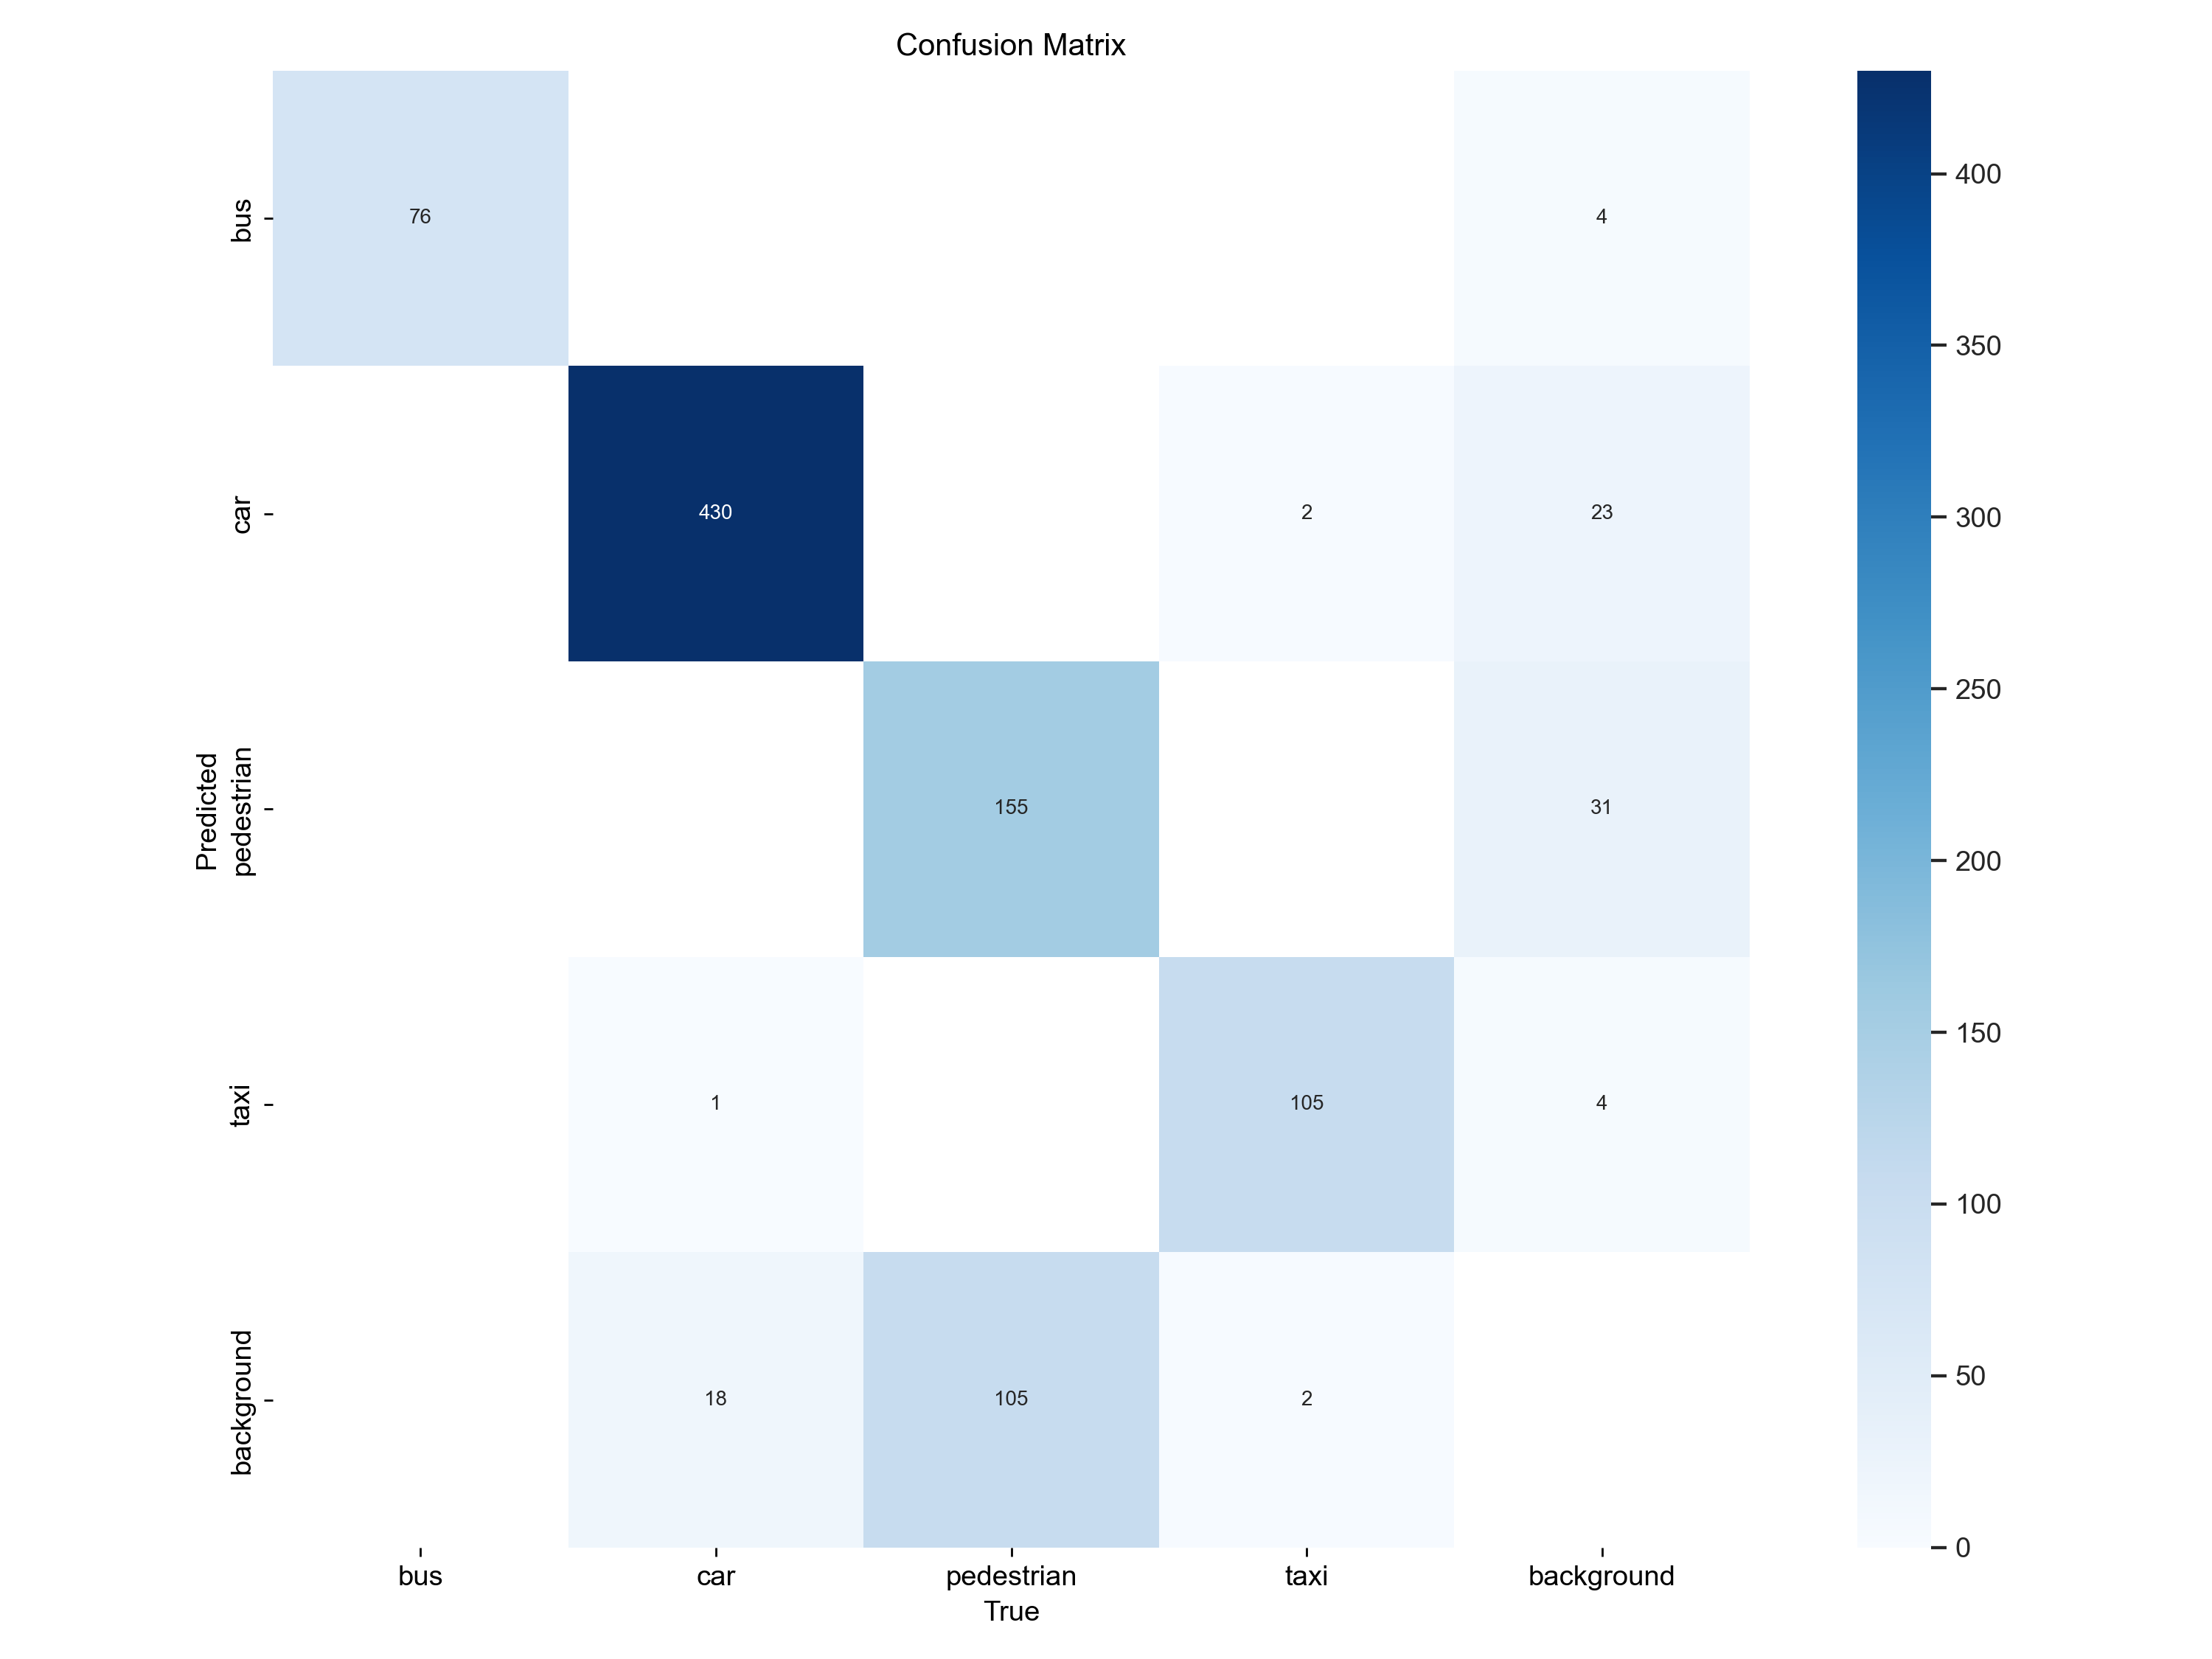

In [11]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

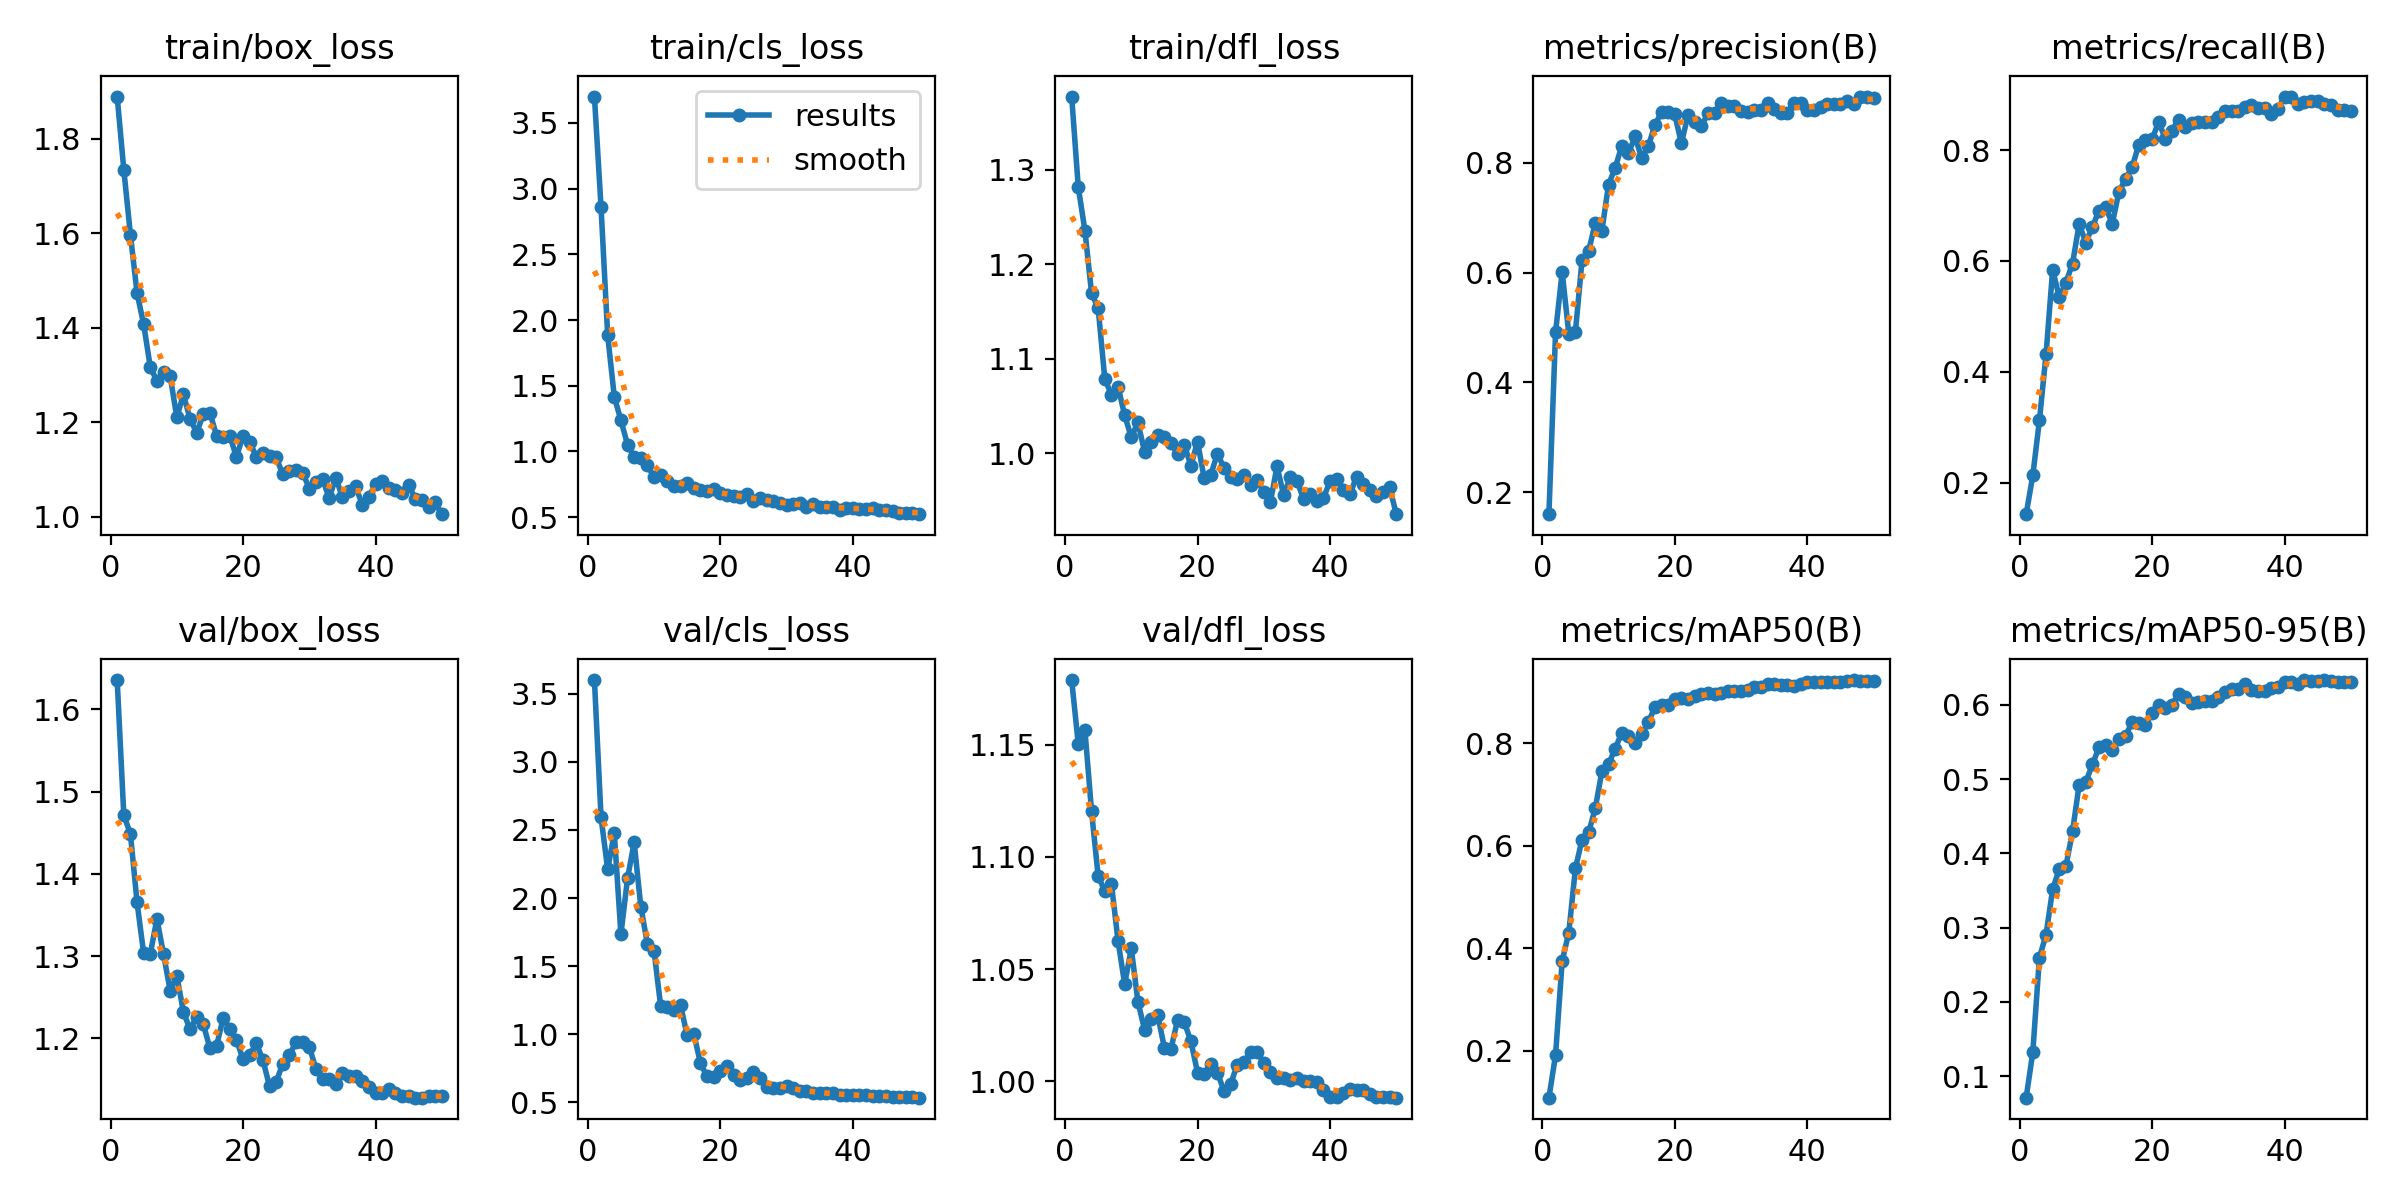

In [12]:
Image(filename='runs/detect/train/results.png', width=600)

## Result capture in .mp4
![image.png](./markdown-image/result.png)

![image.png](./markdown-image/result2.png)

![image.png](./markdown-image/result3.png)